## Capstone Project - Default of Credit Card Clients

Prepared by Debora Callegari

### Imports

In [1]:
#Importing the necessary packages:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.gridspec as gridspec

import statsmodels.api as sm

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, f1_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier


import warnings
warnings.filterwarnings('ignore')

### Step 9: Gradient Boosting

In [87]:
X_1 = feat_eng_data.drop('default', axis=1)
y_1 = feat_eng_data['default']

In [88]:
# Splitting into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_1, y_1, test_size=0.2, stratify = y_1, random_state=42)

In [89]:
#fitting Boosting

GB_model = GradientBoostingClassifier()
GB_model.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [90]:
print("Gradient Boost score: %3.3f" % (100 * GB_model.score(X_test,y_test)))

Gradient Boost score: 82.549


In [91]:
GB_model.estimators_[0]

array([DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
           max_features=None, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort='auto',
           random_state=<mtrand.RandomState object at 0x10d7bf990>,
           splitter='best')], dtype=object)

In [92]:
GB_model.feature_importances_

array([1.75572944e-02, 7.66405097e-03, 2.57212499e-02, 4.05234026e-03,
       3.58829537e-03, 4.45294773e-03, 5.88364675e-04, 3.67382858e-03,
       2.00435779e-02, 1.50209500e-02, 1.70593126e-02, 8.95604687e-03,
       5.48738748e-03, 1.07902676e-02, 4.72594425e-04, 7.17405104e-04,
       9.41134285e-04, 4.02354547e-06, 0.00000000e+00, 4.56219168e-03,
       1.98795413e-03, 3.14965044e-03, 4.20461584e-01, 1.40793090e-01,
       3.52838895e-02, 1.73667717e-03, 0.00000000e+00, 0.00000000e+00,
       2.09744276e-04, 0.00000000e+00, 0.00000000e+00, 8.34339886e-02,
       1.06982601e-04, 3.56257333e-04, 5.84446235e-04, 1.28294190e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       3.25803441e-02, 0.00000000e+00, 1.21056596e-03, 0.00000000e+00,
       0.00000000e+00, 2.46150016e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.68438292e-02, 0.00000000e+00, 1.08733310e-03,
       0.00000000e+00, 1.01511991e-04, 0.00000000e+00, 3.62017105e-04,
      

In [93]:
GB_model.score(X_test,y_test)

0.8254852320675106

In [94]:
GB_model.score(X_train,y_train)

0.8274537935690776

In [95]:
y_pred = GB_model.predict(X_test)

In [96]:
# Getting the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.95      0.89      4616
           1       0.69      0.39      0.50      1309

   micro avg       0.83      0.83      0.83      5925
   macro avg       0.77      0.67      0.69      5925
weighted avg       0.81      0.83      0.81      5925



[[4384  232]
 [ 802  507]]


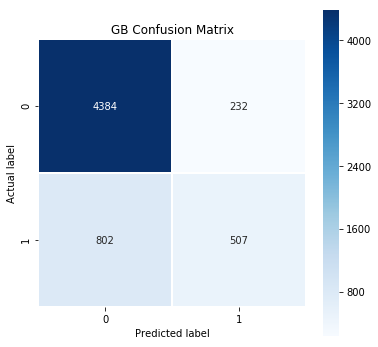

In [97]:
# Getting the confusion matrix
cm_GB_1 = confusion_matrix(y_test, y_pred)
print(cm_GB_1)

# Plotting the confusion matrix with seaborn
plt.figure(figsize=(6,6))
sns.heatmap(cm_GB_1, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues');
plt.title('GB Confusion Matrix');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

Considering the previous results, it is possible to see that Gradient Boosting performed well, because it is performing with default parameters. 

The confusion matrix above showed that the sum of the correct predictions that the model made is equal to 4891 (TN + TP = 4384 + 507). Also, it is possible to see that the model predicted 1034 labels incorrectly. Which means that the model predicted that 802 clients will pay the credit card amount when actually they will default. And the model predicted that 232 clients will default the credit card payment when actually they will pay.